### We have gathered the DataFrame consisting of one species, that is, chicken for the Year 2010 in the notebook "Year_2010". In this notebook we do the same thing, but now for all the 8 species. Then create one dataframe, consisting of the number of species by county and the corresponding number of mean life expectency. 

In [1]:
## lets import the packages

import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats
import pandas as pd


In [2]:
DATA_PATH = 'Data'

# List all the tif files in the folder

tif_files = [x for x in os.listdir(DATA_PATH) if x.endswith('.tif')]
tif_files

['5_Bf_2010_Da.tif',
 '5_Ch_2010_Da.tif',
 '5_Ct_2010_Da.tif',
 '5_Dk_2010_Da.tif',
 '5_Gt_2010_Da.tif',
 '5_Ho_2010_Da.tif',
 '5_Pg_2010_Da.tif',
 '5_Sh_2010_Da.tif']

In [3]:
## path of the shape file

SHAPE_PATH = os.path.join("Shapefiles", "County_shapefile",'gz_2010_us_050_00_500k.shp')
county_shp = gpd.read_file(SHAPE_PATH)

In [4]:
def get_species(tif_file,raster_data):
    
    '''Function to load the tif file of a species.
       The input arguement is essentially the same file. It has been given two different names
       so that there no confusion later. The tif is loaded and then the corresponding raster 
       value of the shape file is found. Unnecessary columns are removed '''
    
    cleaned_arr = rxr.open_rasterio(tif_file, masked=True).squeeze()
    county_shp["raster_val"] = [x["sum"] for x in zonal_stats(vectors=county_shp["geometry"],
                                                           raster=raster_data, 
                                                           stats="sum")]  
    df=pd.DataFrame(county_shp)
    df = df.drop([ 'GEO_ID', 'CENSUSAREA','geometry'], axis=1)
    df['fips']=df['STATE']+df['COUNTY']
    df['fips']=df['fips'].astype(str).astype(int)
    df = df.drop([ 'STATE', 'COUNTY','NAME','LSAD'], axis=1)
    
    return df



In [5]:
%%time

species_1=os.path.join("Data", "5_Bf_2010_Da.tif")
species_2=os.path.join("Data", "5_Ch_2010_Da.tif")
species_3=os.path.join("Data", "5_Ct_2010_Da.tif")
species_4=os.path.join("Data", "5_Dk_2010_Da.tif")
species_5=os.path.join("Data", "5_Gt_2010_Da.tif")
species_6=os.path.join("Data", "5_Ho_2010_Da.tif")
species_7=os.path.join("Data", "5_Pg_2010_Da.tif")
species_8=os.path.join("Data", "5_Sh_2010_Da.tif")

buffalo_df=get_species(tif_file=species_1, raster_data=species_1)
buffalo_df=buffalo_df.rename({'raster_val':'Buffalo'}, axis=1)

chicken_df=get_species(tif_file=species_2, raster_data=species_2)
chicken_df=chicken_df.rename({'raster_val':'Chicken'}, axis=1)

cattle_df=get_species(tif_file=species_3, raster_data=species_3)
cattle_df=cattle_df.rename({'raster_val':'Cattle'}, axis=1)

duck_df=get_species(tif_file=species_4, raster_data=species_4)
duck_df=duck_df.rename({'raster_val':'Duck'}, axis=1)

goat_df=get_species(tif_file=species_5, raster_data=species_5)
goat_df=goat_df.rename({'raster_val':'Goat'}, axis=1)

horse_df=get_species(tif_file=species_6, raster_data=species_6)
horse_df=horse_df.rename({'raster_val':'Horse'}, axis=1)

pig_df=get_species(tif_file=species_7, raster_data=species_7)
pig_df=pig_df.rename({'raster_val':'Pig'}, axis=1)

sheep_df=get_species(tif_file=species_8, raster_data=species_8)
sheep_df=sheep_df.rename({'raster_val':'Sheep'}, axis=1)


Wall time: 1min 30s


In [6]:
## lets start merging these dataframes

df1=pd.merge(chicken_df,buffalo_df, how='left', on=['fips'])
df2=pd.merge(df1,cattle_df, how='left', on=['fips'])
df3=pd.merge(df2,duck_df, how='left', on=['fips'])
df4=pd.merge(df3,goat_df, how='left', on=['fips'])
df5=pd.merge(df4,horse_df, how='left', on=['fips'])
df6=pd.merge(df5,pig_df, how='left', on=['fips'])
df7=pd.merge(df6,sheep_df, how='left', on=['fips'])

In [7]:
livestock_2010=df7.dropna() ## remove NaN

first_column = livestock_2010.pop('fips')  ## place fips at the first column 
livestock_2010.insert(0, 'fips', first_column)
livestock_2010

,fips,Chicken,Buffalo,Cattle,Duck,Goat,Horse,Pig,Sheep
0,1029,4.626162e+06,0.000000,9580.319923,230.963128,233.766068,923.508544,228.911441,79.021039
1,1031,1.165591e+07,5456.785752,23489.512418,349.660984,569.186866,1960.436215,864.375627,134.992983
2,1037,5.336872e+02,0.000000,2872.200483,253.541973,89.961183,452.340805,34.116609,62.226444
3,1039,4.673686e+06,0.000000,27573.365619,350.119946,926.831549,2243.360458,124.360542,605.924720
4,1041,8.862080e+06,0.000000,28291.030787,48.383726,420.369523,947.275746,11.005358,166.785515
...,...,...,...,...,...,...,...,...,...
3215,72129,2.041689e+03,0.000000,11199.377469,290.881845,3.870911,283.416304,994.717139,36.079251
3216,72131,6.590836e+02,0.000000,10734.625400,311.352215,10.001644,26.469596,1541.210550,100.110075
3217,72133,0.000000e+00,0.000000,248.455835,0.000000,2.239535,151.609516,54.115844,39.967816
3218,72137,1.591099e+02,0.000000,501.913496,171.613956,0.000000,11.862958,0.000000,0.602693


#### The required dataframe for the livestocks have been constructed. Lets now look at the life expectency data. Finally, we will merge it

In [8]:
## Now lets merge it with the Life expectency data

LE_2010 = pd.read_csv('LE_2010.csv')
## lets delete these columns. 
LE_2010 = LE_2010.drop([ 'Unnamed: 0','year'], axis=1)
LE_2010


,location_name,fips,MeanLifeExpectency
0,Autauga County (Alabama),1001,75.728489
1,Baldwin County (Alabama),1003,77.826608
2,Barbour County (Alabama),1005,75.841973
3,Bibb County (Alabama),1007,73.705432
4,Blount County (Alabama),1009,75.753407
...,...,...,...
3122,Sweetwater County (Wyoming),56037,77.582422
3123,Teton County (Wyoming),56039,83.771012
3124,Uinta County (Wyoming),56041,77.836526
3125,Washakie County (Wyoming),56043,78.674180


In [9]:
## lets merge the dataset
final_df=pd.merge(LE_2010,livestock_2010, how='left', on=['fips'])
final_df


,location_name,fips,MeanLifeExpectency,Chicken,Buffalo,Cattle,Duck,Goat,Horse,Pig,Sheep
0,Autauga County (Alabama),1001,75.728489,1.169084e+03,2086.083860,15490.396380,203.985001,931.988445,800.259351,41.820359,247.751758
1,Baldwin County (Alabama),1003,77.826608,1.647917e+03,0.000000,20345.184708,134.667855,1359.290184,4137.637792,182.688940,118.129075
2,Barbour County (Alabama),1005,75.841973,4.502049e+06,2467.643037,17912.897175,348.700127,455.381107,701.283795,361.216962,135.364419
3,Bibb County (Alabama),1007,73.705432,1.193082e+03,0.000000,5645.415959,17.861308,343.092180,679.773571,97.947685,78.146948
4,Blount County (Alabama),1009,75.753407,1.079146e+07,0.000000,34905.966839,439.237843,1158.202507,5066.604536,189.292152,244.664121
...,...,...,...,...,...,...,...,...,...,...,...
3122,Sweetwater County (Wyoming),56037,77.582422,4.925465e+02,0.000000,24123.663166,1565.593221,114.963998,1704.487337,320.110439,42341.943157
3123,Teton County (Wyoming),56039,83.771012,1.588491e+02,0.000000,2926.229215,341.237630,12.527192,5263.101568,609.941968,2266.291282
3124,Uinta County (Wyoming),56041,77.836526,4.342637e+02,0.000000,37870.904235,555.917233,394.969653,4118.887523,854.485966,35146.401922
3125,Washakie County (Wyoming),56043,78.674180,3.016990e+02,0.000000,25955.572805,301.210526,197.863158,1430.302785,226.774055,20618.187480


### The dataframe has been constructed. Lets apply machine learning regression

In [10]:
final_df = final_df.drop([ 'location_name','fips'], axis=1)
last_column=final_df.pop('MeanLifeExpectency')  ## move the column to the last column
final_df.insert(8,"MeanLifeExpectency",last_column)
final_df=final_df.dropna()
final_df

,Chicken,Buffalo,Cattle,Duck,Goat,Horse,Pig,Sheep,MeanLifeExpectency
0,1.169084e+03,2086.083860,15490.396380,203.985001,931.988445,800.259351,41.820359,247.751758,75.728489
1,1.647917e+03,0.000000,20345.184708,134.667855,1359.290184,4137.637792,182.688940,118.129075,77.826608
2,4.502049e+06,2467.643037,17912.897175,348.700127,455.381107,701.283795,361.216962,135.364419,75.841973
3,1.193082e+03,0.000000,5645.415959,17.861308,343.092180,679.773571,97.947685,78.146948,73.705432
4,1.079146e+07,0.000000,34905.966839,439.237843,1158.202507,5066.604536,189.292152,244.664121,75.753407
...,...,...,...,...,...,...,...,...,...
3122,4.925465e+02,0.000000,24123.663166,1565.593221,114.963998,1704.487337,320.110439,42341.943157,77.582422
3123,1.588491e+02,0.000000,2926.229215,341.237630,12.527192,5263.101568,609.941968,2266.291282,83.771012
3124,4.342637e+02,0.000000,37870.904235,555.917233,394.969653,4118.887523,854.485966,35146.401922,77.836526
3125,3.016990e+02,0.000000,25955.572805,301.210526,197.863158,1430.302785,226.774055,20618.187480,78.674180


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3097 entries, 0 to 3126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chicken             3097 non-null   float64
 1   Buffalo             3097 non-null   float64
 2   Cattle              3097 non-null   float64
 3   Duck                3097 non-null   float64
 4   Goat                3097 non-null   float64
 5   Horse               3097 non-null   float64
 6   Pig                 3097 non-null   float64
 7   Sheep               3097 non-null   float64
 8   MeanLifeExpectency  3097 non-null   float64
dtypes: float64(9)
memory usage: 242.0 KB


In [12]:
final_df.describe()

,Chicken,Buffalo,Cattle,Duck,Goat,Horse,Pig,Sheep,MeanLifeExpectency
count,3.097000e+03,3097.000000,3.097000e+03,3.097000e+03,3097.000000,3097.000000,3.097000e+03,3097.000000,3097.000000
mean,6.315764e+05,390.965887,3.003531e+04,2.223275e+03,971.645171,3218.564366,2.096278e+04,1794.752907,77.551513
std,2.380687e+06,1558.281848,4.886509e+04,4.716362e+04,2696.759736,5501.512845,9.263851e+04,7368.409667,2.362643
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,66.689077
25%,6.955002e+02,0.000000,5.860883e+03,5.764180e+01,208.685652,884.485722,1.078525e+02,181.746394,75.925319
50%,2.093608e+03,0.000000,1.613037e+04,1.506190e+02,434.765540,1894.431478,3.400656e+02,427.014627,77.687489
75%,7.924983e+03,271.332351,3.761287e+04,3.062211e+02,851.606934,3749.781753,2.627356e+03,1059.061477,79.163554
max,4.056678e+07,35811.270593,1.135775e+06,2.339334e+06,63925.327410,169143.625373,2.045677e+06,195805.941134,89.633202


###  Lets try without hyperparameter optimization

In [13]:
## Lets create a Train-Test set and transform the data.

features=final_df.drop("MeanLifeExpectency",axis=1)
target=final_df["MeanLifeExpectency"].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target, test_size=0.20)

In [14]:
## Lets now train the model using Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train prediction
train_prediction_RF=forest_reg.predict(X_train)
RF_mse=mean_squared_error(y_train,train_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_train=RF_rmse

print('The train RMSE is:::', '%.2f' % RF_rmse)

The train RMSE is::: 0.75


In [15]:
## The test prediction

test_prediction_RF=forest_reg.predict(X_test)
RF_mse=mean_squared_error(y_test,test_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_test=RF_rmse

print('The test RMSE for is:::', '%.2f' % RF_rmse)

The test RMSE for is::: 1.99


In [16]:
### The correlation values

from scipy.stats import pearsonr

## The train correlation
train_r_sq=(pearsonr(y_train,train_prediction_RF)[0])**2
correlation_train=int(train_r_sq*100)/100 ## display only two digits without rounding
print(correlation_train)

## The test correlation
test_r_sq=(pearsonr(y_test,test_prediction_RF)[0])**2
correlation_test=int(test_r_sq*100)/100 ## display only two digits without rounding
print(correlation_test)

0.94
0.27


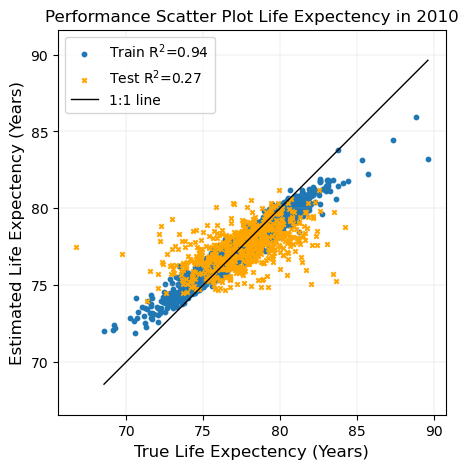

In [17]:
## Lets plot the scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_train, train_prediction_RF,s=10,c='C0',label="Train R$^2$={}".format(correlation_train))
plt.scatter(y_test, test_prediction_RF,marker='x',s=10,c='orange',label='Test R$^2$={}'.format(correlation_test))

p1 = max(max(train_prediction_RF), max(y_train))
p2 = min(min(train_prediction_RF), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black',label='1:1 line',linewidth=1)
plt.xlabel('True Life Expectency (Years)', fontsize=12)
plt.ylabel('Estimated Life Expectency (Years)', fontsize=12)
plt.axis('equal')

plt.title("Performance Scatter Plot Life Expectency in 2010", fontsize=12)
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [18]:
print(y_train.shape)
print(y_test.shape)

(2477,)
(620,)


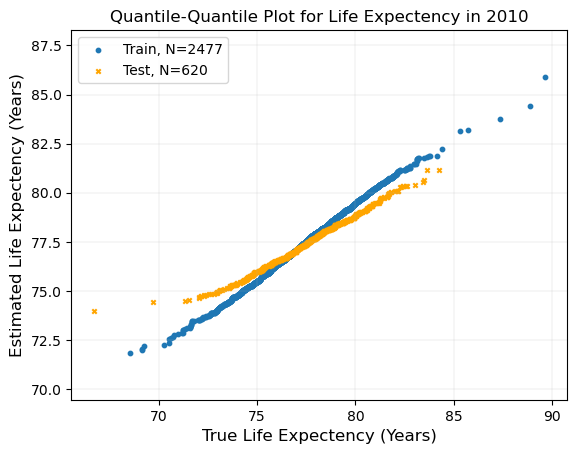

In [19]:
## lets plot the quantile-quantile plot
## note that since the estimated values and the true values have the same number, sorting the
## true and estimated values and plotting it will do the task

true_train=np.sort(y_train)
est_train=np.sort(train_prediction_RF)

true_test=np.sort(y_test)
est_test=np.sort(test_prediction_RF)

plt.scatter(true_train,est_train,s=10,c='C0',label="Train, N=2477")
plt.scatter(true_test,est_test,s=10,marker='x',c='orange',label="Test, N=620")


plt.xlabel('True Life Expectency (Years)', fontsize=12)
plt.ylabel('Estimated Life Expectency (Years)', fontsize=12)
plt.axis('equal')

plt.title("Quantile-Quantile Plot for Life Expectency in 2010", fontsize=12)
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()